In [1]:
import random

import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pandas.read_csv("Data/tabular-playground-series-aug-2022/train.csv")


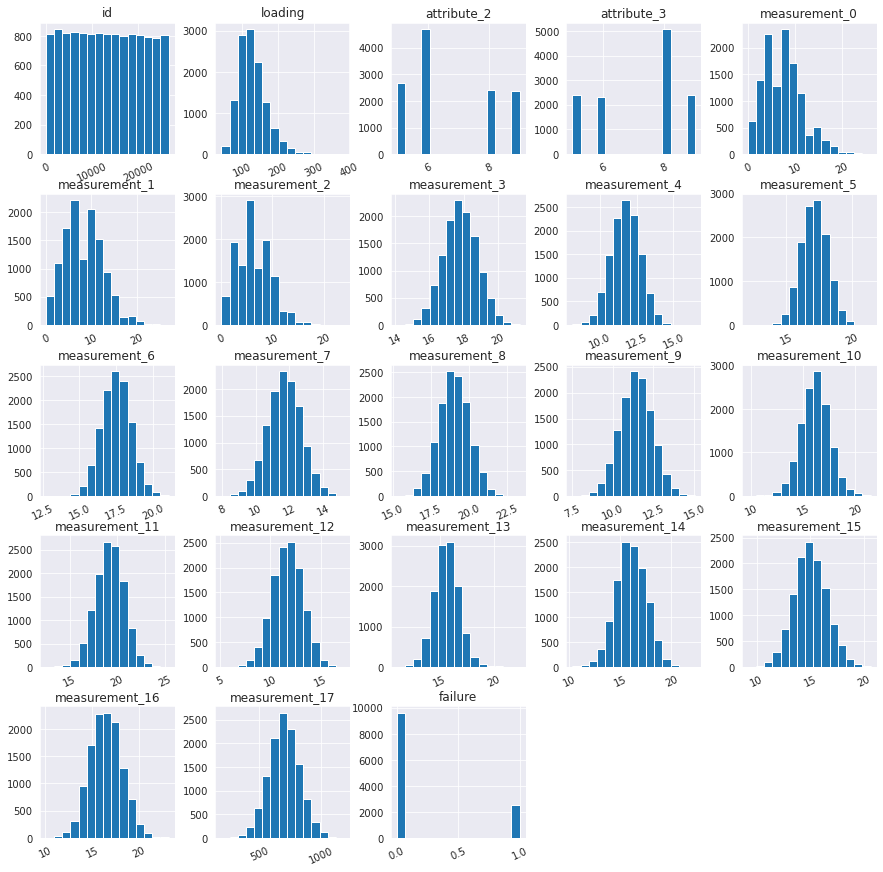

In [3]:
df.dropna().hist(bins=15, xrot=25, figsize=(15, 15))
plt.show()

In [4]:
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [5]:
df["product_code"].fillna(df["product_code"].mode()[0], inplace=True)
df["attribute_0"].fillna(df["attribute_0"].mode()[0], inplace=True)
df["attribute_1"].fillna(df["attribute_1"].mode()[0], inplace=True)
df["attribute_2"].fillna(df["attribute_2"].mode()[0], inplace=True)
df["attribute_3"].fillna(df["attribute_3"].mode()[0], inplace=True)
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


Chose to use mode on attribute 2 and 3 because distribution did not seem to fit well to a mean or median impute, will also make these categorical.

In [6]:
numeric_cols = df.columns.tolist()
numeric_cols.remove('id'), numeric_cols.remove('product_code'), numeric_cols.remove("attribute_0"), numeric_cols.remove("attribute_1"), numeric_cols.remove("attribute_2"), numeric_cols.remove("attribute_3"), numeric_cols.remove("failure")
numeric_cols

['loading',
 'measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [7]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df.isna().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

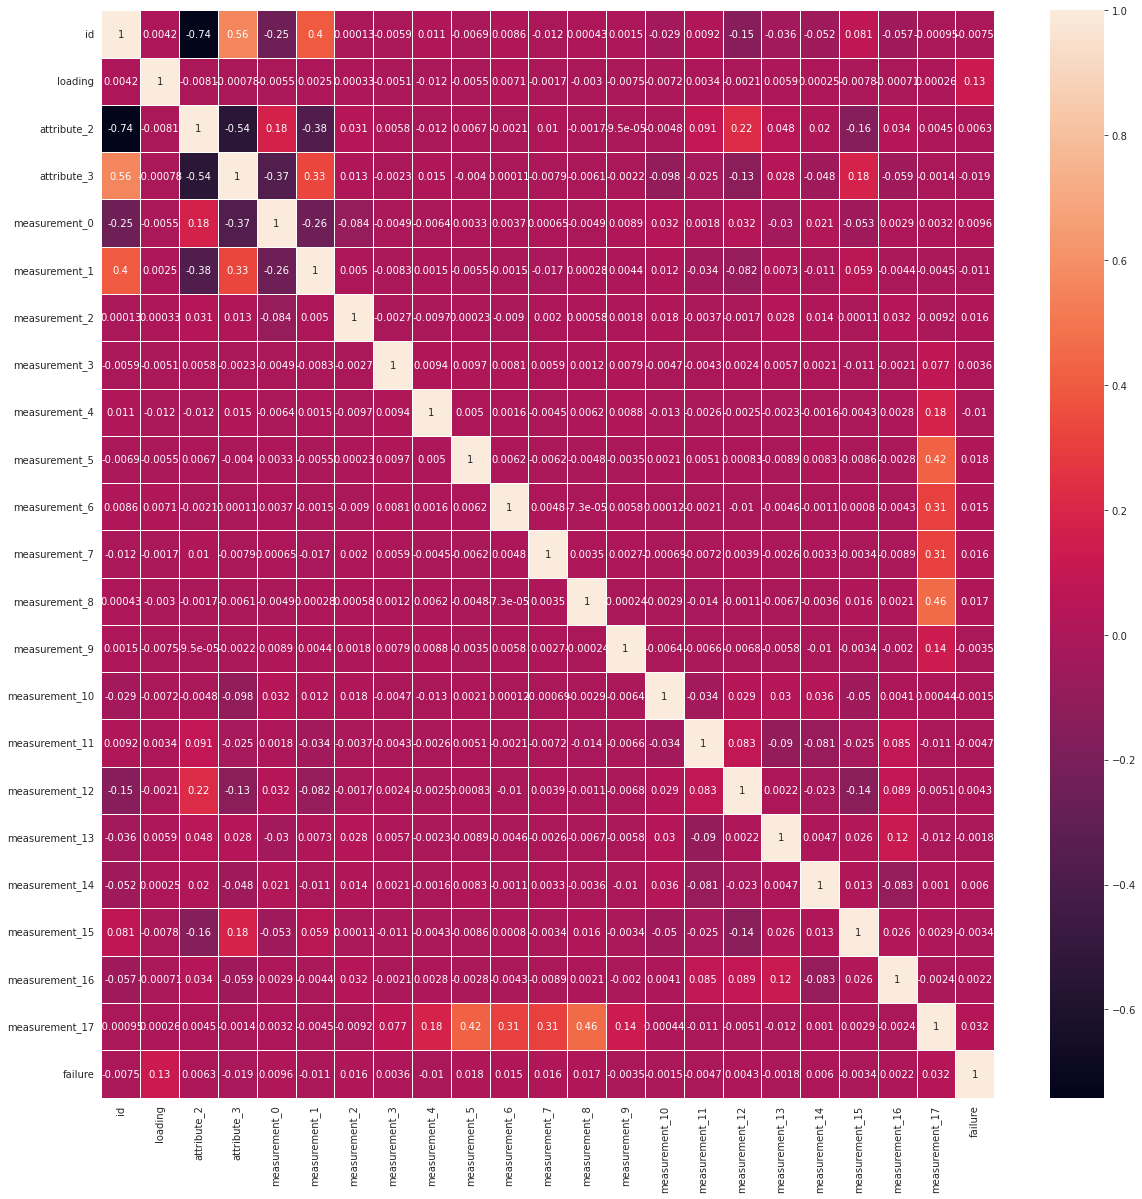

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr, linewidths=0.5, annot=True, ax=ax)
plt.show()

In [9]:
corr["failure"]

id               -0.007545
loading           0.128662
attribute_2       0.006337
attribute_3      -0.019222
measurement_0     0.009646
measurement_1    -0.010810
measurement_2     0.015808
measurement_3     0.003564
measurement_4    -0.010371
measurement_5     0.017825
measurement_6     0.014567
measurement_7     0.016491
measurement_8     0.016786
measurement_9    -0.003500
measurement_10   -0.001477
measurement_11   -0.004670
measurement_12    0.004273
measurement_13   -0.001761
measurement_14    0.005974
measurement_15   -0.003411
measurement_16    0.002166
measurement_17    0.032382
failure           1.000000
Name: failure, dtype: float64

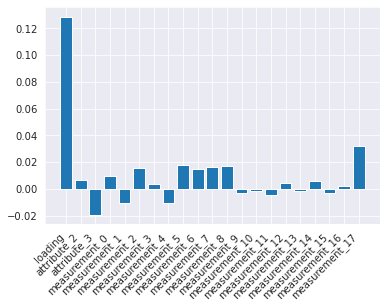

In [10]:
x_ticks = corr["failure"].index
values = corr["failure"].array
plt.bar(x_ticks[1:-1], values[1:-1])
plt.xticks(rotation=45, ha="right")
plt.show()

In [11]:
def data_pipe(df):
    df["product_code"].fillna(df["product_code"].mode()[0], inplace=True)
    df["attribute_0"].fillna(df["attribute_0"].mode()[0], inplace=True)
    df["attribute_1"].fillna(df["attribute_1"].mode()[0], inplace=True)
    df["attribute_2"].fillna(df["attribute_2"].mode()[0], inplace=True)
    df["attribute_3"].fillna(df["attribute_3"].mode()[0], inplace=True)
    numeric_cols = df.columns.tolist()
    numeric_cols.remove('id'), numeric_cols.remove('product_code'), numeric_cols.remove("attribute_0"), numeric_cols.remove("attribute_1"), numeric_cols.remove("attribute_2"), numeric_cols.remove("attribute_3")
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)
    p_code_OH = pd.get_dummies(df.product_code, prefix="p_code")
    attribute_0_OH = pd.get_dummies(df.attribute_0, prefix="attribute_0")
    attribute_1_OH = pd.get_dummies(df.attribute_1, prefix="attribute_1")
    attribute_2_OH = pd.get_dummies(df.attribute_2, prefix="attribute_2")
    attribute_3_OH = pd.get_dummies(df.attribute_0, prefix="attribute_3")
    df = df.drop(["product_code", "attribute_0", "attribute_1", "attribute_2", "attribute_3"], axis=1)
    df = df.join([p_code_OH, attribute_0_OH, attribute_1_OH, attribute_2_OH, attribute_3_OH])
    return df

df_train = pandas.read_csv("Data/tabular-playground-series-aug-2022/train.csv")
df_test = pandas.read_csv("Data/tabular-playground-series-aug-2022/test.csv")
df_total = data_pipe(pd.concat([df_train.drop("failure", axis=1), df_test]))
df_total = df_total.drop_duplicates(subset=["id"]).sort_values(by="id")
df = df_total.iloc[:len(df_train)].join(df_train["failure"])
df_test = df_total.iloc[len(df_train):]

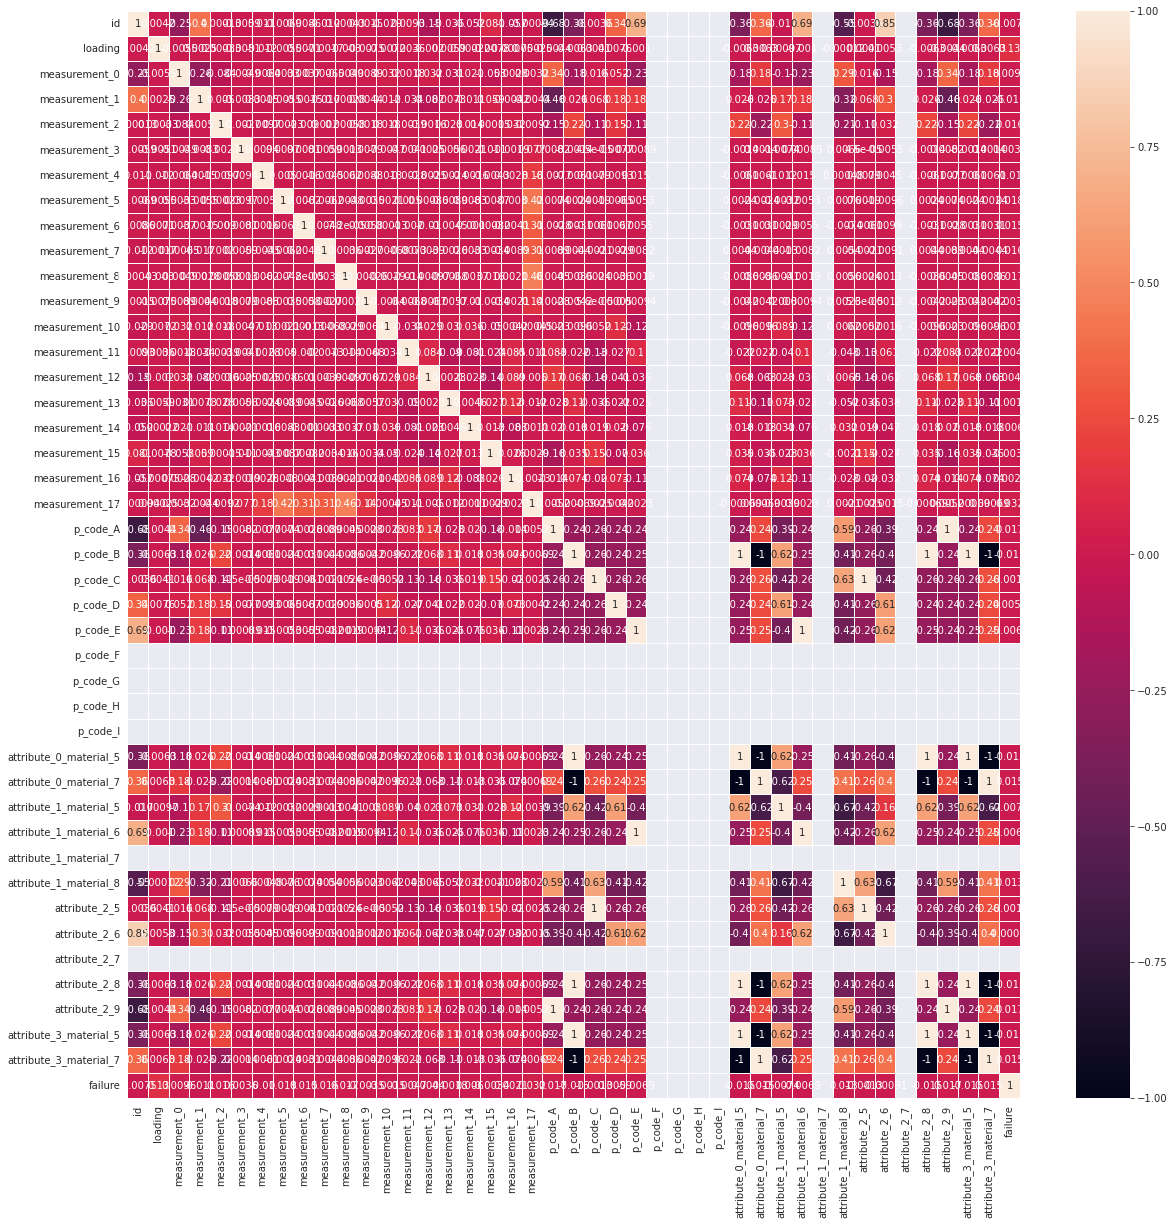

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr, linewidths=0.5, annot=True, ax=ax)
plt.show()

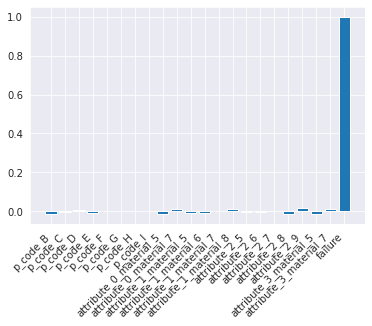

In [13]:
x_ticks = corr["failure"].index
values = corr["failure"].array
plt.bar(x_ticks[21:], values[21:])
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
zipped_array = zip(x_ticks[1:], values[1:])
sorted_best_features = list(reversed(sorted(zipped_array, key=lambda x: abs(x[1]))))
sorted_best_features

[('failure', 1.0),
 ('attribute_2_7', nan),
 ('attribute_1_material_7', nan),
 ('p_code_I', nan),
 ('p_code_H', nan),
 ('p_code_G', nan),
 ('p_code_F', nan),
 ('loading', 0.12866473758198096),
 ('measurement_17', 0.032383729879727444),
 ('measurement_5', 0.017824895837625025),
 ('attribute_2_9', 0.01744710267655989),
 ('p_code_A', 0.01744710267655989),
 ('measurement_8', 0.016781944767529578),
 ('measurement_7', 0.016492234785368733),
 ('measurement_2', 0.01580756575056398),
 ('attribute_3_material_5', -0.01482960128777474),
 ('attribute_2_8', -0.01482960128777474),
 ('attribute_0_material_5', -0.01482960128777474),
 ('p_code_B', -0.01482960128777474),
 ('attribute_3_material_7', 0.014829601287774606),
 ('attribute_0_material_7', 0.014829601287774606),
 ('measurement_6', 0.014566597502718227),
 ('attribute_1_material_8', 0.012912324023663855),
 ('measurement_1', -0.010809988608657724),
 ('measurement_4', -0.010373303685233232),
 ('measurement_0', 0.009645933201494298),
 ('attribute_1_m

In [15]:
train, val = train_test_split(df, test_size=0.15, random_state=27, shuffle=True)
x_train, y_train = train.drop(["failure", "id"], axis=1), train["failure"]
x_val, y_val = val.drop(["failure", "id"], axis=1), val["failure"]

In [16]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn import svm

clf_gbc = GradientBoostingClassifier(random_state=27).fit(x_train, y_train)
clf_gbc.score(x_val, y_val)

0.7865027596588058

In [17]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(random_state=27).fit(x_train, y_train)
clf_xgb.score(x_val, y_val)

/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, p

[09:26:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7739588559959859

In [18]:
clf_rf = RandomForestClassifier(random_state=27).fit(x_train, y_train)
clf_rf.score(x_val, y_val)

0.7860010035122931

In [19]:
clf_bc = BaggingClassifier(random_state=27).fit(x_train, y_train)
clf_bc.score(x_val, y_val)

0.7681886603110888

In [20]:
clf_svm = svm.SVC(probability=True).fit(x_train, y_train)
clf_svm.score(x_val, y_val)

0.787255393878575

In [21]:
import torch
from torch import nn

class MyNNClassifier(nn.Module):

    def __init__(self, feature_size, output_dim, hidden_dim=128):
        super().__init__()

        self.input = nn.Linear(feature_size, hidden_dim)
        self.relu = nn.ReLU()
        self.hidden_0 = nn.Linear(hidden_dim, hidden_dim)
        self.batchnorm_0 = nn.BatchNorm1d(hidden_dim)
        self.hidden_1 = nn.Linear(hidden_dim, hidden_dim)
        self.batchnorm_1 = nn.BatchNorm1d(hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        self.layers = [self.input, self.hidden_0, self.batchnorm_0, self.hidden_1, self.batchnorm_1]

    def forward(self, x):
        a = x
        for layer in self.layers:
            z = layer(a)
            a = self.relu(z)
        z_out = self.output(a)
        a_out = self.sigmoid(z_out)
        return a_out



In [22]:
from tqdm import tqdm, trange
from torch.utils.data import DataLoader

device = "cuda"


In [23]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    """
    Train our model
    """
    model.train()
    for epoch in tqdm(range(1, n_epochs + 1)):
        loss_train = 0.0
        for features, labels in train_loader:
            # print(features.shape)

            features = features.to(device=device)
            labels = labels.to(device=device)

            outputs = model(features)
            # print(outputs.dtype, labels.dtype)
            loss = loss_fn(outputs, labels)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
                0, epoch,
                loss_train / len(train_loader)))
    model.eval()

In [24]:
x_train_tensor, y_train_tensor = torch.tensor(x_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
class TorchDataset:

    def __init__(self, x, y):
        self.features = x
        self.labels = y

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return self.features.shape[0]

t_dataset = TorchDataset(x_train_tensor, y_train_tensor)
loader = DataLoader(t_dataset, batch_size=256)
x_train_tensor.shape

torch.Size([22584, 41])

In [25]:
model = MyNNClassifier(x_train_tensor.shape[1], 1, hidden_dim=1024)
optim = torch.optim.Adam(model.parameters(), lr=0.00001)
loss = nn.BCELoss()
model.to(device)

MyNNClassifier(
  (input): Linear(in_features=41, out_features=1024, bias=True)
  (relu): ReLU()
  (hidden_0): Linear(in_features=1024, out_features=1024, bias=True)
  (batchnorm_0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_1): Linear(in_features=1024, out_features=1024, bias=True)
  (batchnorm_1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [26]:
training_loop(20, optim, model, loss, loader)

  0%|          | 2/2000 [00:01<14:59,  2.22it/s]

0  |  Epoch 1  |  Training loss 0.614


  1%|          | 11/2000 [00:02<06:14,  5.32it/s]

0  |  Epoch 10  |  Training loss 0.504


  1%|          | 21/2000 [00:04<06:09,  5.35it/s]

0  |  Epoch 20  |  Training loss 0.496


  2%|▏         | 31/2000 [00:06<06:18,  5.20it/s]

0  |  Epoch 30  |  Training loss 0.490


  2%|▏         | 41/2000 [00:08<06:09,  5.31it/s]

0  |  Epoch 40  |  Training loss 0.482


  3%|▎         | 51/2000 [00:10<06:21,  5.11it/s]

0  |  Epoch 50  |  Training loss 0.476


  3%|▎         | 61/2000 [00:12<06:02,  5.35it/s]

0  |  Epoch 60  |  Training loss 0.467


  4%|▎         | 71/2000 [00:14<05:54,  5.43it/s]

0  |  Epoch 70  |  Training loss 0.458


  4%|▍         | 81/2000 [00:16<06:04,  5.26it/s]

0  |  Epoch 80  |  Training loss 0.448


  5%|▍         | 91/2000 [00:18<06:07,  5.19it/s]

0  |  Epoch 90  |  Training loss 0.439


  5%|▌         | 101/2000 [00:19<05:58,  5.29it/s]

0  |  Epoch 100  |  Training loss 0.429


  6%|▌         | 111/2000 [00:21<06:21,  4.96it/s]

0  |  Epoch 110  |  Training loss 0.421


  6%|▌         | 120/2000 [00:23<05:50,  5.37it/s]

0  |  Epoch 120  |  Training loss 0.410


  7%|▋         | 131/2000 [00:25<05:46,  5.40it/s]

0  |  Epoch 130  |  Training loss 0.403


  7%|▋         | 141/2000 [00:27<05:42,  5.42it/s]

0  |  Epoch 140  |  Training loss 0.392


  8%|▊         | 151/2000 [00:29<05:41,  5.41it/s]

0  |  Epoch 150  |  Training loss 0.381


  8%|▊         | 161/2000 [00:31<05:35,  5.49it/s]

0  |  Epoch 160  |  Training loss 0.373


  9%|▊         | 171/2000 [00:33<05:39,  5.39it/s]

0  |  Epoch 170  |  Training loss 0.363


  9%|▉         | 181/2000 [00:35<05:53,  5.15it/s]

0  |  Epoch 180  |  Training loss 0.354


 10%|▉         | 191/2000 [00:37<05:54,  5.10it/s]

0  |  Epoch 190  |  Training loss 0.344


 10%|█         | 201/2000 [00:39<05:53,  5.09it/s]

0  |  Epoch 200  |  Training loss 0.334


 11%|█         | 211/2000 [00:40<05:22,  5.54it/s]

0  |  Epoch 210  |  Training loss 0.323


 11%|█         | 221/2000 [00:42<05:38,  5.25it/s]

0  |  Epoch 220  |  Training loss 0.312


 12%|█▏        | 231/2000 [00:44<05:25,  5.43it/s]

0  |  Epoch 230  |  Training loss 0.304


 12%|█▏        | 241/2000 [00:46<05:28,  5.35it/s]

0  |  Epoch 240  |  Training loss 0.295


 13%|█▎        | 251/2000 [00:48<05:24,  5.38it/s]

0  |  Epoch 250  |  Training loss 0.289


 13%|█▎        | 261/2000 [00:50<05:28,  5.30it/s]

0  |  Epoch 260  |  Training loss 0.280


 14%|█▎        | 271/2000 [00:52<05:27,  5.27it/s]

0  |  Epoch 270  |  Training loss 0.270


 14%|█▍        | 281/2000 [00:54<05:39,  5.06it/s]

0  |  Epoch 280  |  Training loss 0.261


 14%|█▍        | 290/2000 [00:56<05:12,  5.46it/s]

0  |  Epoch 290  |  Training loss 0.252


 15%|█▌        | 301/2000 [00:58<05:05,  5.56it/s]

0  |  Epoch 300  |  Training loss 0.245


 16%|█▌        | 311/2000 [00:59<05:05,  5.53it/s]

0  |  Epoch 310  |  Training loss 0.237


 16%|█▌        | 321/2000 [01:01<05:00,  5.59it/s]

0  |  Epoch 320  |  Training loss 0.226


 17%|█▋        | 331/2000 [01:03<04:55,  5.65it/s]

0  |  Epoch 330  |  Training loss 0.214


 17%|█▋        | 341/2000 [01:05<04:55,  5.62it/s]

0  |  Epoch 340  |  Training loss 0.205


 18%|█▊        | 351/2000 [01:07<05:07,  5.36it/s]

0  |  Epoch 350  |  Training loss 0.199


 18%|█▊        | 361/2000 [01:09<05:06,  5.34it/s]

0  |  Epoch 360  |  Training loss 0.192


 19%|█▊        | 371/2000 [01:11<05:17,  5.14it/s]

0  |  Epoch 370  |  Training loss 0.183


 19%|█▉        | 381/2000 [01:12<04:42,  5.73it/s]

0  |  Epoch 380  |  Training loss 0.179


 20%|█▉        | 391/2000 [01:14<04:37,  5.79it/s]

0  |  Epoch 390  |  Training loss 0.172


 20%|██        | 401/2000 [01:16<04:41,  5.67it/s]

0  |  Epoch 400  |  Training loss 0.164


 21%|██        | 411/2000 [01:18<05:01,  5.27it/s]

0  |  Epoch 410  |  Training loss 0.158


 21%|██        | 421/2000 [01:20<04:56,  5.33it/s]

0  |  Epoch 420  |  Training loss 0.156


 22%|██▏       | 431/2000 [01:22<04:52,  5.37it/s]

0  |  Epoch 430  |  Training loss 0.146


 22%|██▏       | 441/2000 [01:24<04:52,  5.33it/s]

0  |  Epoch 440  |  Training loss 0.141


 23%|██▎       | 451/2000 [01:26<04:58,  5.18it/s]

0  |  Epoch 450  |  Training loss 0.132


 23%|██▎       | 460/2000 [01:27<04:38,  5.54it/s]

0  |  Epoch 460  |  Training loss 0.123


 24%|██▎       | 471/2000 [01:29<04:38,  5.49it/s]

0  |  Epoch 470  |  Training loss 0.115


 24%|██▍       | 481/2000 [01:31<04:41,  5.40it/s]

0  |  Epoch 480  |  Training loss 0.110


 25%|██▍       | 491/2000 [01:33<04:44,  5.31it/s]

0  |  Epoch 490  |  Training loss 0.106


 25%|██▌       | 501/2000 [01:35<04:41,  5.32it/s]

0  |  Epoch 500  |  Training loss 0.102


 26%|██▌       | 511/2000 [01:37<04:37,  5.36it/s]

0  |  Epoch 510  |  Training loss 0.096


 26%|██▌       | 521/2000 [01:39<04:34,  5.39it/s]

0  |  Epoch 520  |  Training loss 0.089


 27%|██▋       | 531/2000 [01:41<04:38,  5.27it/s]

0  |  Epoch 530  |  Training loss 0.085


 27%|██▋       | 541/2000 [01:43<04:46,  5.10it/s]

0  |  Epoch 540  |  Training loss 0.080


 28%|██▊       | 550/2000 [01:44<04:20,  5.56it/s]

0  |  Epoch 550  |  Training loss 0.074


 28%|██▊       | 561/2000 [01:46<04:25,  5.41it/s]

0  |  Epoch 560  |  Training loss 0.068


 29%|██▊       | 571/2000 [01:48<04:25,  5.39it/s]

0  |  Epoch 570  |  Training loss 0.064


 29%|██▉       | 581/2000 [01:50<04:28,  5.28it/s]

0  |  Epoch 580  |  Training loss 0.062


 30%|██▉       | 591/2000 [01:52<04:20,  5.40it/s]

0  |  Epoch 590  |  Training loss 0.060


 30%|███       | 601/2000 [01:54<04:14,  5.49it/s]

0  |  Epoch 600  |  Training loss 0.061


 31%|███       | 611/2000 [01:56<04:26,  5.21it/s]

0  |  Epoch 610  |  Training loss 0.054


 31%|███       | 621/2000 [01:58<04:20,  5.30it/s]

0  |  Epoch 620  |  Training loss 0.050


 32%|███▏      | 630/2000 [01:59<04:06,  5.56it/s]

0  |  Epoch 630  |  Training loss 0.044


 32%|███▏      | 641/2000 [02:02<04:08,  5.46it/s]

0  |  Epoch 640  |  Training loss 0.042


 33%|███▎      | 651/2000 [02:03<04:09,  5.41it/s]

0  |  Epoch 650  |  Training loss 0.046


 33%|███▎      | 660/2000 [02:05<04:09,  5.37it/s]

0  |  Epoch 660  |  Training loss 0.036


 34%|███▎      | 671/2000 [02:07<04:12,  5.26it/s]

0  |  Epoch 670  |  Training loss 0.033


 34%|███▍      | 681/2000 [02:09<04:04,  5.40it/s]

0  |  Epoch 680  |  Training loss 0.041


 35%|███▍      | 691/2000 [02:11<04:05,  5.34it/s]

0  |  Epoch 690  |  Training loss 0.030


 35%|███▌      | 701/2000 [02:13<04:07,  5.25it/s]

0  |  Epoch 700  |  Training loss 0.027


 36%|███▌      | 711/2000 [02:15<04:12,  5.10it/s]

0  |  Epoch 710  |  Training loss 0.034


 36%|███▌      | 720/2000 [02:17<03:48,  5.60it/s]

0  |  Epoch 720  |  Training loss 0.027


 37%|███▋      | 731/2000 [02:19<03:48,  5.56it/s]

0  |  Epoch 730  |  Training loss 0.023


 37%|███▋      | 741/2000 [02:20<03:45,  5.57it/s]

0  |  Epoch 740  |  Training loss 0.071


 38%|███▊      | 751/2000 [02:22<03:47,  5.49it/s]

0  |  Epoch 750  |  Training loss 0.022


 38%|███▊      | 761/2000 [02:24<03:43,  5.54it/s]

0  |  Epoch 760  |  Training loss 0.018


 39%|███▊      | 771/2000 [02:26<03:46,  5.42it/s]

0  |  Epoch 770  |  Training loss 0.015


 39%|███▉      | 781/2000 [02:28<03:45,  5.40it/s]

0  |  Epoch 780  |  Training loss 0.014


 40%|███▉      | 791/2000 [02:30<03:48,  5.28it/s]

0  |  Epoch 790  |  Training loss 0.029


 40%|████      | 800/2000 [02:31<03:35,  5.56it/s]

0  |  Epoch 800  |  Training loss 0.019


 41%|████      | 811/2000 [02:34<03:34,  5.54it/s]

0  |  Epoch 810  |  Training loss 0.015


 41%|████      | 821/2000 [02:35<03:29,  5.62it/s]

0  |  Epoch 820  |  Training loss 0.013


 42%|████▏     | 831/2000 [02:37<03:31,  5.53it/s]

0  |  Epoch 830  |  Training loss 0.168


 42%|████▏     | 841/2000 [02:39<03:29,  5.53it/s]

0  |  Epoch 840  |  Training loss 0.029


 43%|████▎     | 851/2000 [02:41<03:28,  5.50it/s]

0  |  Epoch 850  |  Training loss 0.020


 43%|████▎     | 861/2000 [02:43<03:29,  5.44it/s]

0  |  Epoch 860  |  Training loss 0.015


 44%|████▎     | 871/2000 [02:45<03:33,  5.30it/s]

0  |  Epoch 870  |  Training loss 0.036


 44%|████▍     | 881/2000 [02:47<03:36,  5.16it/s]

0  |  Epoch 880  |  Training loss 0.014


 44%|████▍     | 890/2000 [02:48<03:20,  5.53it/s]

0  |  Epoch 890  |  Training loss 0.012


 45%|████▌     | 901/2000 [02:50<03:21,  5.45it/s]

0  |  Epoch 900  |  Training loss 0.010


 46%|████▌     | 911/2000 [02:52<03:23,  5.36it/s]

0  |  Epoch 910  |  Training loss 0.320


 46%|████▌     | 921/2000 [02:54<03:21,  5.36it/s]

0  |  Epoch 920  |  Training loss 0.025


 46%|████▋     | 930/2000 [02:56<03:21,  5.31it/s]

0  |  Epoch 930  |  Training loss 0.017


 47%|████▋     | 940/2000 [02:59<04:37,  3.82it/s]

0  |  Epoch 940  |  Training loss 0.014


 48%|████▊     | 950/2000 [03:02<04:47,  3.65it/s]

0  |  Epoch 950  |  Training loss 0.012


 48%|████▊     | 960/2000 [03:04<04:39,  3.72it/s]

0  |  Epoch 960  |  Training loss 0.055


 48%|████▊     | 970/2000 [03:06<03:14,  5.28it/s]

0  |  Epoch 970  |  Training loss 0.021


 49%|████▉     | 981/2000 [03:09<03:14,  5.24it/s]

0  |  Epoch 980  |  Training loss 0.016


 50%|████▉     | 991/2000 [03:11<03:10,  5.31it/s]

0  |  Epoch 990  |  Training loss 0.013


 50%|█████     | 1001/2000 [03:13<03:06,  5.34it/s]

0  |  Epoch 1000  |  Training loss 0.078


 51%|█████     | 1011/2000 [03:14<03:03,  5.38it/s]

0  |  Epoch 1010  |  Training loss 0.017


 51%|█████     | 1021/2000 [03:16<03:05,  5.27it/s]

0  |  Epoch 1020  |  Training loss 0.013


 52%|█████▏    | 1031/2000 [03:18<03:01,  5.33it/s]

0  |  Epoch 1030  |  Training loss 0.011


 52%|█████▏    | 1041/2000 [03:20<03:02,  5.25it/s]

0  |  Epoch 1040  |  Training loss 0.010


 53%|█████▎    | 1051/2000 [03:22<03:05,  5.11it/s]

0  |  Epoch 1050  |  Training loss 0.051


 53%|█████▎    | 1060/2000 [03:24<02:48,  5.58it/s]

0  |  Epoch 1060  |  Training loss 0.017


 54%|█████▎    | 1071/2000 [03:26<02:44,  5.63it/s]

0  |  Epoch 1070  |  Training loss 0.013


 54%|█████▍    | 1081/2000 [03:28<02:46,  5.53it/s]

0  |  Epoch 1080  |  Training loss 0.040


 55%|█████▍    | 1091/2000 [03:30<02:45,  5.48it/s]

0  |  Epoch 1090  |  Training loss 0.010


 55%|█████▌    | 1101/2000 [03:31<02:38,  5.66it/s]

0  |  Epoch 1100  |  Training loss 0.008


 56%|█████▌    | 1111/2000 [03:33<02:38,  5.60it/s]

0  |  Epoch 1110  |  Training loss 0.007


 56%|█████▌    | 1121/2000 [03:35<02:39,  5.53it/s]

0  |  Epoch 1120  |  Training loss 0.023


 57%|█████▋    | 1131/2000 [03:37<02:47,  5.20it/s]

0  |  Epoch 1130  |  Training loss 0.010


 57%|█████▋    | 1140/2000 [03:39<02:34,  5.58it/s]

0  |  Epoch 1140  |  Training loss 0.008


 58%|█████▊    | 1151/2000 [03:41<02:28,  5.72it/s]

0  |  Epoch 1150  |  Training loss 0.022


 58%|█████▊    | 1161/2000 [03:42<02:30,  5.58it/s]

0  |  Epoch 1160  |  Training loss 0.008


 59%|█████▊    | 1171/2000 [03:44<02:25,  5.69it/s]

0  |  Epoch 1170  |  Training loss 0.007


 59%|█████▉    | 1181/2000 [03:46<02:25,  5.63it/s]

0  |  Epoch 1180  |  Training loss 0.218


 60%|█████▉    | 1191/2000 [03:48<02:31,  5.33it/s]

0  |  Epoch 1190  |  Training loss 0.013


 60%|██████    | 1201/2000 [03:50<02:31,  5.28it/s]

0  |  Epoch 1200  |  Training loss 0.009


 61%|██████    | 1211/2000 [03:52<02:31,  5.20it/s]

0  |  Epoch 1210  |  Training loss 0.007


 61%|██████    | 1221/2000 [03:54<02:35,  5.01it/s]

0  |  Epoch 1220  |  Training loss 0.006


 62%|██████▏   | 1230/2000 [03:55<02:18,  5.55it/s]

0  |  Epoch 1230  |  Training loss 0.046


 62%|██████▏   | 1241/2000 [03:57<02:20,  5.40it/s]

0  |  Epoch 1240  |  Training loss 0.015


 63%|██████▎   | 1251/2000 [03:59<02:17,  5.45it/s]

0  |  Epoch 1250  |  Training loss 0.012


 63%|██████▎   | 1261/2000 [04:01<02:12,  5.57it/s]

0  |  Epoch 1260  |  Training loss 0.010


 64%|██████▎   | 1271/2000 [04:03<02:11,  5.53it/s]

0  |  Epoch 1270  |  Training loss 0.063


 64%|██████▍   | 1281/2000 [04:05<02:12,  5.43it/s]

0  |  Epoch 1280  |  Training loss 0.011


 65%|██████▍   | 1291/2000 [04:07<02:11,  5.40it/s]

0  |  Epoch 1290  |  Training loss 0.008


 65%|██████▌   | 1301/2000 [04:09<02:15,  5.16it/s]

0  |  Epoch 1300  |  Training loss 0.007


 66%|██████▌   | 1310/2000 [04:10<02:06,  5.46it/s]

0  |  Epoch 1310  |  Training loss 0.031


 66%|██████▌   | 1321/2000 [04:12<02:00,  5.61it/s]

0  |  Epoch 1320  |  Training loss 0.010


 67%|██████▋   | 1331/2000 [04:14<02:00,  5.56it/s]

0  |  Epoch 1330  |  Training loss 0.008


 67%|██████▋   | 1341/2000 [04:16<01:58,  5.57it/s]

0  |  Epoch 1340  |  Training loss 0.007


 68%|██████▊   | 1351/2000 [04:18<01:58,  5.46it/s]

0  |  Epoch 1350  |  Training loss 0.082


 68%|██████▊   | 1361/2000 [04:20<01:59,  5.33it/s]

0  |  Epoch 1360  |  Training loss 0.014


 69%|██████▊   | 1371/2000 [04:22<01:55,  5.45it/s]

0  |  Epoch 1370  |  Training loss 0.010


 69%|██████▉   | 1381/2000 [04:24<01:57,  5.25it/s]

0  |  Epoch 1380  |  Training loss 0.008


 70%|██████▉   | 1391/2000 [04:26<01:59,  5.11it/s]

0  |  Epoch 1390  |  Training loss 0.038


 70%|███████   | 1400/2000 [04:27<01:48,  5.53it/s]

0  |  Epoch 1400  |  Training loss 0.008


 71%|███████   | 1411/2000 [04:29<01:45,  5.56it/s]

0  |  Epoch 1410  |  Training loss 0.007


 71%|███████   | 1421/2000 [04:31<01:44,  5.52it/s]

0  |  Epoch 1420  |  Training loss 0.006


 72%|███████▏  | 1431/2000 [04:33<01:44,  5.46it/s]

0  |  Epoch 1430  |  Training loss 0.046


 72%|███████▏  | 1441/2000 [04:35<01:40,  5.57it/s]

0  |  Epoch 1440  |  Training loss 0.012


 73%|███████▎  | 1451/2000 [04:37<01:39,  5.52it/s]

0  |  Epoch 1450  |  Training loss 0.009


 73%|███████▎  | 1461/2000 [04:39<01:40,  5.37it/s]

0  |  Epoch 1460  |  Training loss 0.008


 74%|███████▎  | 1471/2000 [04:41<01:39,  5.32it/s]

0  |  Epoch 1470  |  Training loss 0.151


 74%|███████▍  | 1481/2000 [04:42<01:40,  5.17it/s]

0  |  Epoch 1480  |  Training loss 0.008


 75%|███████▍  | 1491/2000 [04:44<01:31,  5.57it/s]

0  |  Epoch 1490  |  Training loss 0.006


 75%|███████▌  | 1501/2000 [04:46<01:28,  5.62it/s]

0  |  Epoch 1500  |  Training loss 0.006


 76%|███████▌  | 1511/2000 [04:48<01:27,  5.58it/s]

0  |  Epoch 1510  |  Training loss 0.005


 76%|███████▌  | 1521/2000 [04:50<01:28,  5.44it/s]

0  |  Epoch 1520  |  Training loss 0.014


 77%|███████▋  | 1531/2000 [04:52<01:26,  5.40it/s]

0  |  Epoch 1530  |  Training loss 0.009


 77%|███████▋  | 1541/2000 [04:54<01:24,  5.43it/s]

0  |  Epoch 1540  |  Training loss 0.007


 78%|███████▊  | 1551/2000 [04:55<01:24,  5.33it/s]

0  |  Epoch 1550  |  Training loss 0.006


 78%|███████▊  | 1561/2000 [04:57<01:25,  5.15it/s]

0  |  Epoch 1560  |  Training loss 0.011


 78%|███████▊  | 1570/2000 [04:59<01:16,  5.59it/s]

0  |  Epoch 1570  |  Training loss 0.008


 79%|███████▉  | 1581/2000 [05:01<01:15,  5.58it/s]

0  |  Epoch 1580  |  Training loss 0.006


 80%|███████▉  | 1591/2000 [05:03<01:15,  5.45it/s]

0  |  Epoch 1590  |  Training loss 0.006


 80%|████████  | 1601/2000 [05:05<01:17,  5.12it/s]

0  |  Epoch 1600  |  Training loss 0.027


 81%|████████  | 1611/2000 [05:07<01:11,  5.42it/s]

0  |  Epoch 1610  |  Training loss 0.012


 81%|████████  | 1621/2000 [05:09<01:09,  5.47it/s]

0  |  Epoch 1620  |  Training loss 0.009


 82%|████████▏ | 1631/2000 [05:11<01:07,  5.45it/s]

0  |  Epoch 1630  |  Training loss 0.007


 82%|████████▏ | 1641/2000 [05:12<01:08,  5.25it/s]

0  |  Epoch 1640  |  Training loss 0.006


 83%|████████▎ | 1651/2000 [05:14<01:06,  5.24it/s]

0  |  Epoch 1650  |  Training loss 0.168


 83%|████████▎ | 1661/2000 [05:16<00:59,  5.74it/s]

0  |  Epoch 1660  |  Training loss 0.015


 84%|████████▎ | 1671/2000 [05:18<00:59,  5.52it/s]

0  |  Epoch 1670  |  Training loss 0.010


 84%|████████▍ | 1681/2000 [05:20<00:56,  5.66it/s]

0  |  Epoch 1680  |  Training loss 0.008


 85%|████████▍ | 1691/2000 [05:21<00:53,  5.75it/s]

0  |  Epoch 1690  |  Training loss 0.007


 85%|████████▌ | 1701/2000 [05:23<00:53,  5.55it/s]

0  |  Epoch 1700  |  Training loss 0.059


 86%|████████▌ | 1711/2000 [05:25<00:54,  5.28it/s]

0  |  Epoch 1710  |  Training loss 0.009


 86%|████████▌ | 1721/2000 [05:27<00:53,  5.26it/s]

0  |  Epoch 1720  |  Training loss 0.011


 87%|████████▋ | 1731/2000 [05:29<00:53,  5.01it/s]

0  |  Epoch 1730  |  Training loss 0.006


 87%|████████▋ | 1740/2000 [05:31<00:52,  4.99it/s]

0  |  Epoch 1740  |  Training loss 0.005


 88%|████████▊ | 1751/2000 [05:33<00:47,  5.29it/s]

0  |  Epoch 1750  |  Training loss 0.004


 88%|████████▊ | 1761/2000 [05:35<00:45,  5.30it/s]

0  |  Epoch 1760  |  Training loss 0.175


 89%|████████▊ | 1771/2000 [05:37<00:40,  5.63it/s]

0  |  Epoch 1770  |  Training loss 0.009


 89%|████████▉ | 1781/2000 [05:38<00:39,  5.56it/s]

0  |  Epoch 1780  |  Training loss 0.007


 90%|████████▉ | 1791/2000 [05:40<00:37,  5.53it/s]

0  |  Epoch 1790  |  Training loss 0.005


 90%|█████████ | 1801/2000 [05:42<00:36,  5.41it/s]

0  |  Epoch 1800  |  Training loss 0.026


 91%|█████████ | 1811/2000 [05:44<00:34,  5.40it/s]

0  |  Epoch 1810  |  Training loss 0.007


 91%|█████████ | 1821/2000 [05:46<00:33,  5.34it/s]

0  |  Epoch 1820  |  Training loss 0.005


 92%|█████████▏| 1831/2000 [05:48<00:29,  5.72it/s]

0  |  Epoch 1830  |  Training loss 0.004


 92%|█████████▏| 1840/2000 [05:49<00:28,  5.62it/s]

0  |  Epoch 1840  |  Training loss 0.004


 93%|█████████▎| 1851/2000 [05:51<00:27,  5.50it/s]

0  |  Epoch 1850  |  Training loss 0.010


 93%|█████████▎| 1861/2000 [05:53<00:25,  5.42it/s]

0  |  Epoch 1860  |  Training loss 0.006


 94%|█████████▎| 1871/2000 [05:55<00:23,  5.41it/s]

0  |  Epoch 1870  |  Training loss 0.005


 94%|█████████▍| 1881/2000 [05:57<00:22,  5.34it/s]

0  |  Epoch 1880  |  Training loss 0.004


 95%|█████████▍| 1891/2000 [05:59<00:21,  5.12it/s]

0  |  Epoch 1890  |  Training loss 0.063


 95%|█████████▌| 1901/2000 [06:01<00:19,  5.06it/s]

0  |  Epoch 1900  |  Training loss 0.007


 96%|█████████▌| 1910/2000 [06:03<00:16,  5.45it/s]

0  |  Epoch 1910  |  Training loss 0.005


 96%|█████████▌| 1921/2000 [06:05<00:14,  5.46it/s]

0  |  Epoch 1920  |  Training loss 0.004


 97%|█████████▋| 1931/2000 [06:07<00:12,  5.45it/s]

0  |  Epoch 1930  |  Training loss 0.004


 97%|█████████▋| 1941/2000 [06:09<00:11,  5.33it/s]

0  |  Epoch 1940  |  Training loss 0.032


 98%|█████████▊| 1951/2000 [06:10<00:09,  5.42it/s]

0  |  Epoch 1950  |  Training loss 0.014


 98%|█████████▊| 1961/2000 [06:12<00:07,  5.40it/s]

0  |  Epoch 1960  |  Training loss 0.008


 99%|█████████▊| 1971/2000 [06:14<00:05,  5.27it/s]

0  |  Epoch 1970  |  Training loss 0.006


 99%|█████████▉| 1981/2000 [06:16<00:03,  5.18it/s]

0  |  Epoch 1980  |  Training loss 0.005


100%|█████████▉| 1991/2000 [06:18<00:01,  5.10it/s]

0  |  Epoch 1990  |  Training loss 0.352


100%|██████████| 2000/2000 [06:20<00:00,  5.26it/s]

0  |  Epoch 2000  |  Training loss 0.012


In [27]:
x_val_tensor, y_val_tensor = torch.tensor(x_val.values, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
v_dataset = TorchDataset(x_val_tensor, y_val_tensor)
loader = DataLoader(t_dataset, batch_size=256)

In [28]:
def validate(model, loader):
    """
    Compute classification accuracies on both train and val dataset
    """
    accdict = {}
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in loader:
            features = features.to(device=device)
            labels = labels.to(device=device)

            outputs = model(features)
            predicted = torch.round(outputs)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())

    print("Accuracy {}: {:.2f}".format("val" , correct / total))
    accdict["val"] = correct / total
    return accdict

In [29]:
acc = validate(model, loader)

Accuracy val: 0.92


In [30]:
df = df_test
# train, val = train_test_split(df, test_size=0.15, random_state=27, shuffle=True)
x, y = df.drop(["id"], axis=1), df["id"]
x_tensor, y_tensor = torch.tensor(x.values, dtype=torch.float32), torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)
x_tensor

tensor([[119.5700,   6.0000,   9.0000,  ...,   1.0000,   0.0000,   1.0000],
        [113.5100,  11.0000,   8.0000,  ...,   1.0000,   0.0000,   1.0000],
        [112.1600,   8.0000,  12.0000,  ...,   1.0000,   0.0000,   1.0000],
        ...,
        [ 67.7300,  10.0000,  11.0000,  ...,   0.0000,   0.0000,   1.0000],
        [126.1500,   8.0000,  16.0000,  ...,   0.0000,   0.0000,   1.0000],
        [ 85.9700,   0.0000,  11.0000,  ...,   0.0000,   0.0000,   1.0000]])

In [31]:
y_tensor

tensor([[26570.],
        [26571.],
        [26572.],
        ...,
        [47342.],
        [47343.],
        [47344.]])

In [32]:
results = []

for x_, y_ in zip(x_tensor, y_tensor):
    x_ = x_.view(1, -1).to(device)
    out = model(x_)
    results.append((y_, out))

In [33]:
results

[(tensor([26570.]),
  tensor([[0.0037]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26571.]),
  tensor([[0.0019]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26572.]),
  tensor([[0.0006]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26573.]),
  tensor([[0.0150]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26574.]),
  tensor([[0.2147]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26575.]),
  tensor([[0.0464]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26576.]),
  tensor([[7.8237e-06]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26577.]),
  tensor([[0.1048]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26578.]),
  tensor([[8.4505e-06]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26579.]),
  tensor([[0.0013]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26580.]),
  tensor([[0.0013]], device='cuda:0', grad_fn=<SigmoidBackward0>)),
 (tensor([26581.]),
  te

In [34]:
with open("Data/tabular-playground-series-aug-2022/results.csv", 'w') as file:
    file.write("id,failure\n")
    for id, pred in results:
        file.write(str(int(id)) + "," + str(float(pred[0])) + "\n")

In [35]:
results = []
y_ = clf_svm.predict_proba(x)
y_

array([[0.79330312, 0.20669688],
       [0.7763641 , 0.2236359 ],
       [0.79449637, 0.20550363],
       ...,
       [0.76458921, 0.23541079],
       [0.80843098, 0.19156902],
       [0.7517797 , 0.2482203 ]])

In [36]:
with open("Data/tabular-playground-series-aug-2022/results_svm.csv", 'w') as file:
    file.write("id,failure\n")
    for id, pred in zip(y, y_):
        file.write(str(int(id)) + "," + str(int(pred[0])) + "\n")

In [37]:
y

0        26570
1        26571
2        26572
3        26573
4        26574
         ...  
20770    47340
20771    47341
20772    47342
20773    47343
20774    47344
Name: id, Length: 20775, dtype: int64